In [8]:
require(tidyverse)
require(ggpubr)
require(wesanderson)

Loading required package: wesanderson


In [3]:
df <- read_delim('szilyagi1966.csv', delim = ';')  %>% 
    mutate(n_dead = patients_followed - survivors)

Parsed with column specification:
cols(
  size = col_character(),
  year_of_follow_up = col_double(),
  patients_followed = col_double(),
  survivors = col_double()
)


In [4]:
df

size,year_of_follow_up,patients_followed,survivors,n_dead
small,1,44,33,11
small,2,43,31,12
small,3,41,28,13
small,4,35,20,15
small,5,23,11,12
small,6,20,9,11
small,7,19,8,11
small,8,13,3,10
small,9,10,1,9
small,10,9,1,8


In [10]:
options(repr.plot.width=3, repr.plot.height=3)

df  %>% 
    ggplot(aes(x = year_of_follow_up, y = survivors/patients_followed, col = size)) + 
    geom_point() + 
    geom_line(stat="smooth", method = 'loess',
              size = 1,
              alpha = 0.5) +
    scale_color_manual(values = wes_palette("Darjeeling1"), labels = c('>6 cm', '<6 cm')) + 
    scale_y_continuous(labels = scales::percent) +
    labs(y = 'Survival Rate',
         x = 'Years in study',
         col = '')    +
    theme_pubclean() -> p_szilyagi

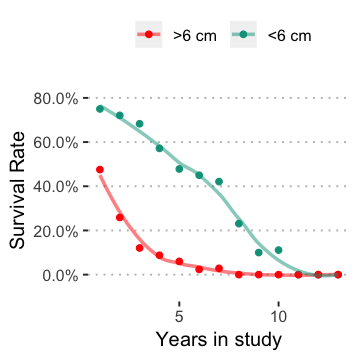

In [11]:
p_szilyagi

In [60]:
ggsave(filename = 'szilyagi1966.pdf', p_szilyagi, width = 3, height = 3)

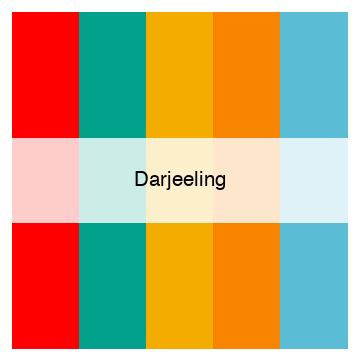

In [42]:
wes_palette("Darjeeling")